In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Input,Dropout,Flatten
import os
import cv2 as cv
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model

In [2]:
path='C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data'
ct1=['test','train']
ct2=['cats','dogs']
data=[]
for i in ct1:
    pt1=os.path.join(path,i)
    for j in ct2:
        pt2=os.path.join(pt1,j)

        for k in os.listdir(pt2):
            label=ct2.index(j)
            x1=os.path.join(pt2,k)
            img=cv.imread(x1)
            array=cv.resize(img,(130,130))
            data.append([array,label])

In [34]:
os.chdir('C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data')

In [35]:
os.getcwd()

'C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data'

In [3]:
x1

'C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\train\\dogs\\9.jpg'

In [4]:
pt1

'C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\train'

In [5]:
pt2

'C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\train\\dogs'

In [6]:
len(data)

60

In [7]:
data[43][1]

1

In [8]:
import random
random.shuffle(data)

In [9]:
data[43][1]

1

In [10]:
X=[]
y=[]
for i,j in data:
    X.append(i)
    y.append(j)
    
X=np.array(X)
y=np.array(y)
X=X/255

In [11]:
X.dtype

dtype('float64')

In [12]:
y[1]

1

In [13]:
X.shape

(60, 130, 130, 3)

from keras.preprocessing.image import ImageDataGenerator
IDG=ImageDataGenerator(shear_range=(0.1),zoom_range=(0.1),horizontal_flip=True,brightness_range=(0.1,0.5))

In [15]:
from tensorflow.keras import Sequential,layers
fc_size=32
logdir='C:\\Users\\Arbaj'
model=Sequential()
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.add(layers.experimental.preprocessing.RandomFlip('horizontal'))
model.add(layers.experimental.preprocessing.RandomRotation(0.1))
model.add(layers.experimental.preprocessing.RandomZoom(0.1))
model.add(layers.experimental.preprocessing.RandomContrast(0.1))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(fc_size,input_shape=(130,130,3),activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,y,epochs=300,validation_split=0.3,callbacks=[tensorboard_callback])

Epoch 1/300
2/2 [==============================] - 11s 1s/step - loss: 0.7764 - accuracy: 0.4286 - val_loss: 1.1947 - val_accuracy: 0.3889
Epoch 2/300
2/2 [==============================] - 0s 320ms/step - loss: 0.9623 - accuracy: 0.5714 - val_loss: 0.7198 - val_accuracy: 0.3889
Epoch 3/300
2/2 [==============================] - 0s 319ms/step - loss: 0.6934 - accuracy: 0.5476 - val_loss: 0.6773 - val_accuracy: 0.6111
Epoch 4/300
2/2 [==============================] - 0s 299ms/step - loss: 0.6974 - accuracy: 0.5238 - val_loss: 0.6867 - val_accuracy: 0.5556
Epoch 5/300
2/2 [==============================] - 0s 315ms/step - loss: 0.6822 - accuracy: 0.5238 - val_loss: 0.7190 - val_accuracy: 0.3889
Epoch 6/300
2/2 [==============================] - 0s 284ms/step - loss: 0.6855 - accuracy: 0.5476 - val_loss: 0.7514 - val_accuracy: 0.3889
Epoch 7/300
2/2 [==============================] - 0s 301ms/step - loss: 0.6643 - accuracy: 0.5476 - val_loss: 0.7313 - val_accuracy: 0.3889
Epoch 8/300
2/2

2/2 [==============================] - 0s 302ms/step - loss: 0.2419 - accuracy: 0.9048 - val_loss: 1.4512 - val_accuracy: 0.5556
Epoch 49/300
2/2 [==============================] - 0s 289ms/step - loss: 0.2181 - accuracy: 0.9048 - val_loss: 1.7566 - val_accuracy: 0.6111
Epoch 50/300
2/2 [==============================] - 0s 316ms/step - loss: 0.1790 - accuracy: 0.9762 - val_loss: 2.4341 - val_accuracy: 0.6667
Epoch 51/300
2/2 [==============================] - 0s 299ms/step - loss: 0.3139 - accuracy: 0.9048 - val_loss: 2.2481 - val_accuracy: 0.6111
Epoch 52/300
2/2 [==============================] - 0s 328ms/step - loss: 0.2570 - accuracy: 0.9762 - val_loss: 1.6923 - val_accuracy: 0.6111
Epoch 53/300
2/2 [==============================] - 0s 321ms/step - loss: 0.3508 - accuracy: 0.7619 - val_loss: 1.5528 - val_accuracy: 0.5556
Epoch 54/300
2/2 [==============================] - 1s 337ms/step - loss: 0.2210 - accuracy: 0.9048 - val_loss: 1.6743 - val_accuracy: 0.5556
Epoch 55/300
2/2 [=

Epoch 106/300
2/2 [==============================] - 1s 432ms/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 3.8564 - val_accuracy: 0.5556
Epoch 107/300
2/2 [==============================] - 1s 514ms/step - loss: 0.0590 - accuracy: 0.9762 - val_loss: 4.2131 - val_accuracy: 0.6111
Epoch 108/300
2/2 [==============================] - 1s 429ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 4.5225 - val_accuracy: 0.6111
Epoch 109/300
2/2 [==============================] - 1s 436ms/step - loss: 0.0826 - accuracy: 0.9762 - val_loss: 4.4888 - val_accuracy: 0.5556
Epoch 110/300
2/2 [==============================] - 1s 449ms/step - loss: 0.1084 - accuracy: 0.9762 - val_loss: 3.8201 - val_accuracy: 0.5556
Epoch 111/300
2/2 [==============================] - 1s 354ms/step - loss: 0.0868 - accuracy: 0.9762 - val_loss: 3.5314 - val_accuracy: 0.6111
Epoch 112/300
2/2 [==============================] - 1s 450ms/step - loss: 0.1505 - accuracy: 0.9524 - val_loss: 3.5970 - val_accuracy: 0.5556

2/2 [==============================] - 1s 451ms/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 3.7344 - val_accuracy: 0.5556
Epoch 164/300
2/2 [==============================] - 1s 431ms/step - loss: 0.0451 - accuracy: 1.0000 - val_loss: 3.8059 - val_accuracy: 0.5556
Epoch 165/300
2/2 [==============================] - 1s 468ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 4.0321 - val_accuracy: 0.5000
Epoch 166/300
2/2 [==============================] - 1s 441ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 4.7174 - val_accuracy: 0.5000
Epoch 167/300
2/2 [==============================] - 1s 459ms/step - loss: 0.0677 - accuracy: 0.9762 - val_loss: 4.3962 - val_accuracy: 0.5000
Epoch 168/300
2/2 [==============================] - 1s 534ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 3.8019 - val_accuracy: 0.5000
Epoch 169/300
2/2 [==============================] - 1s 432ms/step - loss: 0.3946 - accuracy: 0.8571 - val_loss: 4.1853 - val_accuracy: 0.5000
Epoch 170/300

2/2 [==============================] - 1s 520ms/step - loss: 0.0629 - accuracy: 0.9762 - val_loss: 3.4578 - val_accuracy: 0.6111
Epoch 221/300
2/2 [==============================] - 1s 449ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 3.3643 - val_accuracy: 0.6111
Epoch 222/300
2/2 [==============================] - 1s 457ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 3.3235 - val_accuracy: 0.6111
Epoch 223/300
2/2 [==============================] - 1s 467ms/step - loss: 0.0866 - accuracy: 0.9524 - val_loss: 3.1740 - val_accuracy: 0.6111
Epoch 224/300
2/2 [==============================] - 1s 528ms/step - loss: 0.0454 - accuracy: 1.0000 - val_loss: 3.1459 - val_accuracy: 0.5556
Epoch 225/300
2/2 [==============================] - 1s 466ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 3.1901 - val_accuracy: 0.5556
Epoch 226/300
2/2 [==============================] - 1s 426ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 3.2198 - val_accuracy: 0.5556
Epoch 227/300

2/2 [==============================] - 1s 424ms/step - loss: 0.0570 - accuracy: 0.9524 - val_loss: 4.1820 - val_accuracy: 0.6111
Epoch 278/300
2/2 [==============================] - 1s 461ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 4.2305 - val_accuracy: 0.6111
Epoch 279/300
2/2 [==============================] - 1s 494ms/step - loss: 0.0343 - accuracy: 0.9762 - val_loss: 4.2200 - val_accuracy: 0.6111
Epoch 280/300
2/2 [==============================] - 1s 479ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 4.2193 - val_accuracy: 0.5556
Epoch 281/300
2/2 [==============================] - 1s 452ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 4.2097 - val_accuracy: 0.5556
Epoch 282/300
2/2 [==============================] - 1s 500ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 4.1943 - val_accuracy: 0.6111
Epoch 283/300
2/2 [==============================] - 1s 480ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 4.2553 - val_accuracy: 0.5556
Epoch 284/300

1/1 [==============================] - 0s 47ms/step
Model : It's a DOG


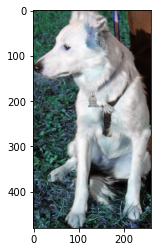

In [36]:
TEST_PATH = "C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "dogs/")

test_dog_img = test_dogs_images[7]
test_dog_img = cv.imread(TEST_PATH + os.sep+ "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")

In [16]:
c_size=32
IMAGE_SHAPE = 130

input_layer = Input(shape=(IMAGE_SHAPE, IMAGE_SHAPE, 3))

convolution_layer_1 = Conv2D(32, kernel_size=(5,5), activation = 'relu')(input_layer)
max_pool_1 = MaxPooling2D(pool_size=(2,2), strides=2)(convolution_layer_1)

convolution_layer_2 = Conv2D(64, kernel_size=(5,5), activation = 'relu')(max_pool_1)
max_pool_2 = MaxPooling2D(pool_size=(2,2),strides=2)(convolution_layer_2)


dense_layer_1 = Dense(fc_size, activation='relu')(max_pool_2)
flatten_layer_1 = Flatten()(dense_layer_1)
dropout_1 = Dropout(0.4)(flatten_layer_1)





output_layer = Dense(1, activation='sigmoid')(dropout_1)

model1 = Model(inputs=input_layer, outputs=output_layer)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
model1.fit(X,y,epochs=100,validation_split=0.33)

Epoch 1/100
2/2 [==============================] - 1s 547ms/step - loss: 1.3705e-04 - accuracy: 1.0000 - val_loss: 1.1910 - val_accuracy: 0.8000
Epoch 2/100
2/2 [==============================] - 0s 75ms/step - loss: 2.9953e-05 - accuracy: 1.0000 - val_loss: 1.1991 - val_accuracy: 0.8000
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 3.4041e-05 - accuracy: 1.0000 - val_loss: 1.2079 - val_accuracy: 0.8000
Epoch 4/100
2/2 [==============================] - 0s 79ms/step - loss: 2.5856e-05 - accuracy: 1.0000 - val_loss: 1.2166 - val_accuracy: 0.8000
Epoch 5/100
2/2 [==============================] - 0s 75ms/step - loss: 2.8574e-05 - accuracy: 1.0000 - val_loss: 1.2262 - val_accuracy: 0.8000
Epoch 6/100
2/2 [==============================] - 0s 70ms/step - loss: 2.0559e-05 - accuracy: 1.0000 - val_loss: 1.2354 - val_accuracy: 0.8000
Epoch 7/100
2/2 [==============================] - 0s 72ms/step - loss: 2.1310e-05 - accuracy: 1.0000 - val_loss: 1.2461 - val_accuracy

2/2 [==============================] - 0s 84ms/step - loss: 1.1726e-05 - accuracy: 1.0000 - val_loss: 1.3897 - val_accuracy: 0.8000
Epoch 58/100
2/2 [==============================] - 0s 75ms/step - loss: 1.3337e-05 - accuracy: 1.0000 - val_loss: 1.3901 - val_accuracy: 0.8000
Epoch 59/100
2/2 [==============================] - 0s 72ms/step - loss: 1.4633e-05 - accuracy: 1.0000 - val_loss: 1.3918 - val_accuracy: 0.8000
Epoch 60/100
2/2 [==============================] - 0s 75ms/step - loss: 1.1514e-05 - accuracy: 1.0000 - val_loss: 1.3940 - val_accuracy: 0.8000
Epoch 61/100
2/2 [==============================] - 0s 93ms/step - loss: 8.0187e-06 - accuracy: 1.0000 - val_loss: 1.3966 - val_accuracy: 0.8000
Epoch 62/100
2/2 [==============================] - 0s 82ms/step - loss: 7.1428e-06 - accuracy: 1.0000 - val_loss: 1.4003 - val_accuracy: 0.8000
Epoch 63/100
2/2 [==============================] - 0s 77ms/step - loss: 1.2590e-05 - accuracy: 1.0000 - val_loss: 1.4049 - val_accuracy: 0.800

1/1 [==============================] - 0s 55ms/step
Model : It's a DOG


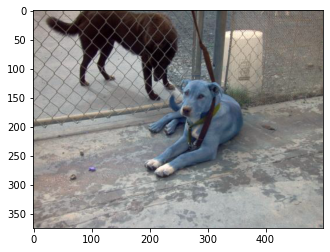

In [32]:
TEST_PATH = "C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "dogs/")

test_dog_img = test_dogs_images[9]
test_dog_img = cv.imread(TEST_PATH + os.sep+ "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model1.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")